In [1]:
import numpy as np
import xarray as xr
import pandas as pd
from salishsea_tools import viz_tools, places, visualisations
from matplotlib import pyplot as plt, dates
from datetime import datetime, timedelta
from calendar import month_name
from scipy.io import loadmat
from tqdm.notebook import tqdm
from salishsea_tools import nc_tools
from dask.diagnostics import ProgressBar
import cmocean

%matplotlib inline

In [2]:
NPGO=np.array([0.416655983,1.406427404,0.410149171,1.242465357,0.832926488,1.356314911,0.122457003,-0.132940854,-1.315864758,-0.030001073,-0.570698404,-1.901666667,-2.188857716,-1.558333333])

In [3]:
NPGO.shape

(14,)

In [4]:
AnnualNitrateAnom=np.array([0.7661672662934293, 0.7946057174181931, 0.9977714439080643, 0.7718455862600528, \
                            0.7328746090495954, 0.9195689984243742, 0.14362021424419424, -0.5891236875973007,\
                            -0.3930831759032607, -0.3052322106822736, -0.8455892484975038, -1.1207258767476098, \
                            -0.9712605646732726, -0.9014390714967107])

In [5]:
SummerDiatomAnom=np.array([1.9598996241167672,
 7.4625711699147,
 6.159889005771577,
 7.264130203451437,
 1.4306089628016672,
 0.024769965498872892,
 0.8760471071439273,
 -6.038132348520801,
 1.5713718128232195,
 -3.7136811476676748,
 -3.6333247217133477,
 -4.0758041013055255,
 -3.841541964752853,
 -5.446803567561965])

In [6]:
AnnualWindAnom=np.array([0.5624350840911205, 0.611054585609601, 0.5629420342383451, 0.8028133772152328, 0.3667445244727201, 0.008051083717511176, -0.47596692419671394, -0.3788445873177926, -0.27978753424310066, -0.08895952877028179, -0.5413632330956397, -0.5355524954857764, -0.4589110948306656, -0.1546552914045587])

In [7]:
SpringWindAnom=np.array([0.5962711061750134, 0.44618565695626344, 0.8226778393700007, 0.824073700677781, 0.8159735089256648, 0.11096754528227315, -0.37610380990164627, -0.31457846505301346, -0.6114057813371931, -0.037362825302850844, -0.38899716876802026, -0.8784479413713728, -0.4613340014503118, -0.5479193642025906])

In [8]:
SummerWindAnom=np.array([0.2642326809111091, 0.7782599585396897, 0.3850447790963303, 0.49798334212530193, 0.19870889754522336, -0.19564147222609796, -0.11334573654901492, -0.11672174362909304, 0.24562426975795137, 0.029069945925757512, -0.6463317416963128, -0.6422366641816644, -0.47972420283726347, -0.20492231278192508])

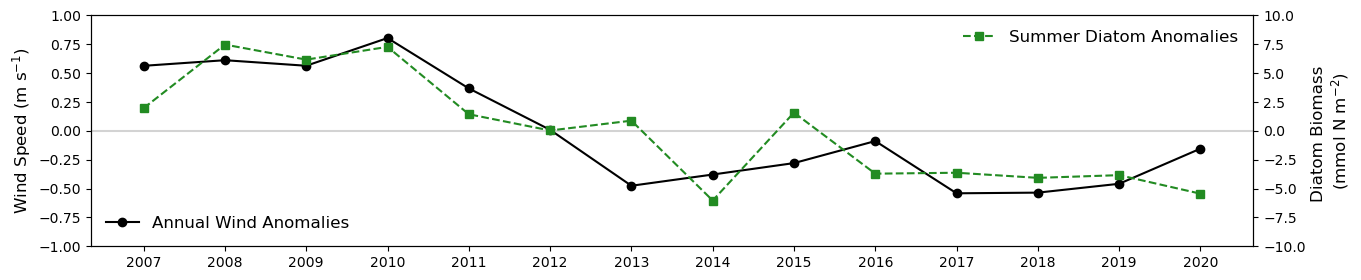

In [9]:
fig, ax1 = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]

xticks=['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']

ax2 = ax1.twinx()

ax1.plot(xticks, AnnualWindAnom,marker='o',label='Annual Wind Anomalies',color='k')
#ax1.plot(xticks, AnnualNitrateAnom,marker='^',label='',color='orange')
ax2.plot(xticks, SummerDiatomAnom,marker='s',linestyle='--',label='Summer Diatom Anomalies',color='forestgreen')
#ax.bar(x,y,color='k')

ax1.set_title('',fontsize=18)  #(with 2015)
ax1.legend(frameon=False,loc=3,fontsize=12)
ax2.legend(frameon=False,loc=1,fontsize=12)
ax1.set_ylim(-1,1)
ax2.set_ylim(-10,10)
ax1.set_ylabel('Wind Speed (m s$^{-1}$)',fontsize=12)
ax2.set_ylabel('Diatom Biomass \n(mmol N m$^{-2}$)',fontsize=12)
ax1.axhline(y=0,color='lightgrey',linestyle='-')



In [10]:
r_summer = np.corrcoef(AnnualWindAnom, SummerDiatomAnom)
r_summer[0,1]

0.8204842291538877

In [11]:
r_NPGOvsWind = np.corrcoef(AnnualWindAnom, NPGO)
r_NPGOvsWind[0,1]

0.7302892595910552

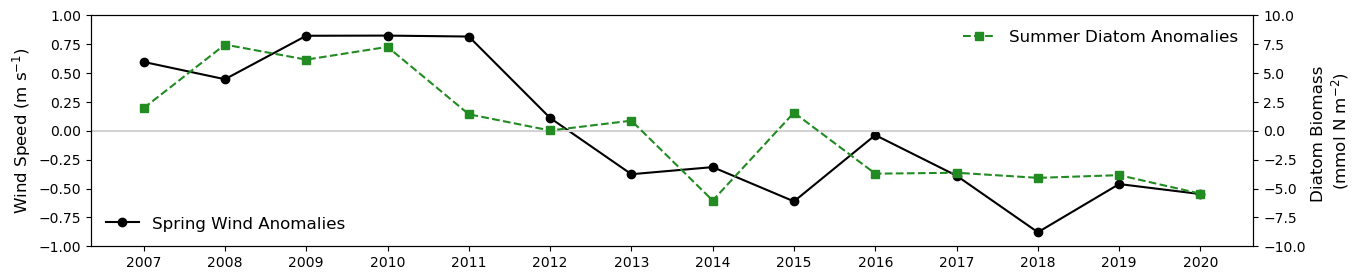

In [12]:
fig, ax1 = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]

xticks=['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']

ax2 = ax1.twinx()

ax1.plot(xticks, SpringWindAnom,marker='o',label='Spring Wind Anomalies',color='k')
#ax1.plot(xticks, AnnualNitrateAnom,marker='^',label='',color='orange')
ax2.plot(xticks, SummerDiatomAnom,marker='s',linestyle='--',label='Summer Diatom Anomalies',color='forestgreen')
#ax.bar(x,y,color='k')

ax1.set_title('',fontsize=18)  #(with 2015)
ax1.legend(frameon=False,loc=3,fontsize=12)
ax2.legend(frameon=False,loc=1,fontsize=12)
ax1.set_ylim(-1,1)
ax2.set_ylim(-10,10)
ax1.set_ylabel('Wind Speed (m s$^{-1}$)',fontsize=12)
ax2.set_ylabel('Diatom Biomass \n(mmol N m$^{-2}$)',fontsize=12)
ax1.axhline(y=0,color='lightgrey',linestyle='-')



In [13]:
r_spring = np.corrcoef(SpringWindAnom, SummerDiatomAnom)
r_spring[0,1]

0.75514894161149

In [14]:
r_NPGOvsSpringWind = np.corrcoef(SpringWindAnom, NPGO)
r_NPGOvsSpringWind[0,1]

0.8107251602279967

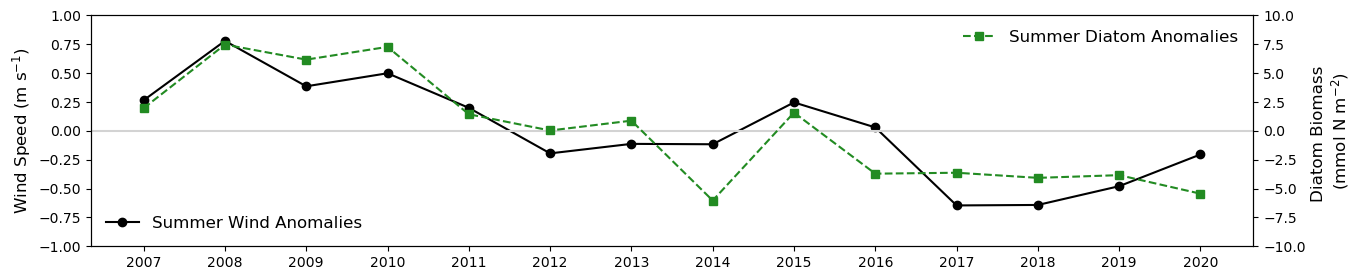

In [15]:
fig, ax1 = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]

xticks=['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']

ax2 = ax1.twinx()

ax1.plot(xticks, SummerWindAnom,marker='o',label='Summer Wind Anomalies',color='k')
#ax1.plot(xticks, AnnualNitrateAnom,marker='^',label='',color='orange')
ax2.plot(xticks, SummerDiatomAnom,marker='s',linestyle='--',label='Summer Diatom Anomalies',color='forestgreen')
#ax.bar(x,y,color='k')

ax1.set_title('',fontsize=18)  #(with 2015)
ax1.legend(frameon=False,loc=3,fontsize=12)
ax2.legend(frameon=False,loc=1,fontsize=12)
ax1.set_ylim(-1,1)
ax2.set_ylim(-10,10)
ax1.set_ylabel('Wind Speed (m s$^{-1}$)',fontsize=12)
ax2.set_ylabel('Diatom Biomass \n(mmol N m$^{-2}$)',fontsize=12)
ax1.axhline(y=0,color='lightgrey',linestyle='-')



In [16]:
r_summerDiatomvswind = np.corrcoef(SummerWindAnom, SummerDiatomAnom)
r_summerDiatomvswind[0,1]

0.8362172185788344

In [17]:
r_NPGOvsSummerWind = np.corrcoef(SummerWindAnom, NPGO)
r_NPGOvsSummerWind[0,1]

0.6766268697263781

In [18]:
SpringDiatomAnom=[-2.277248862884825,
 2.7379648856727528,
 1.2450246688315438,
 -0.22611401269789866,
 -8.927198815961322,
 -3.111948540832749,
 2.335956190767984,
 0.12177304545398471,
 3.189708225738542,
 2.817683737056907,
 -5.242088666469641,
 2.624756676093309,
 4.855680567398391,
 -0.1439490981669742]

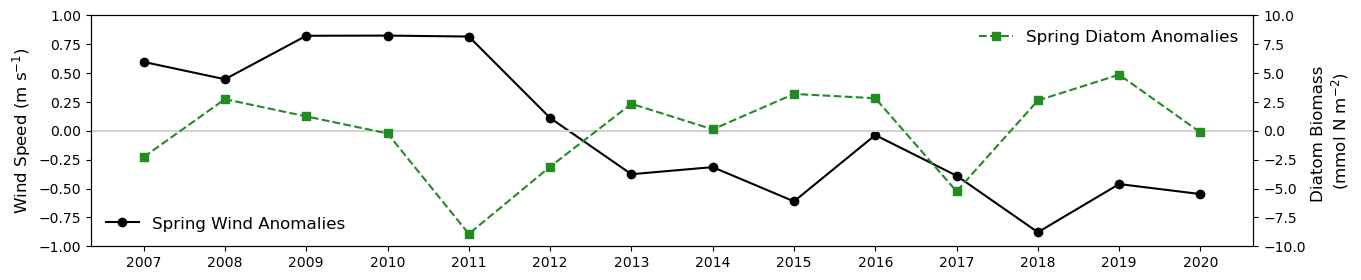

In [19]:
fig, ax1 = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]

xticks=['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']

ax2 = ax1.twinx()

ax1.plot(xticks, SpringWindAnom,marker='o',label='Spring Wind Anomalies',color='k')
#ax1.plot(xticks, AnnualNitrateAnom,marker='^',label='',color='orange')
ax2.plot(xticks, SpringDiatomAnom,marker='s',linestyle='--',label='Spring Diatom Anomalies',color='forestgreen')
#ax.bar(x,y,color='k')

ax1.set_title('',fontsize=18)  #(with 2015)
ax1.legend(frameon=False,loc=3,fontsize=12)
ax2.legend(frameon=False,loc=1,fontsize=12)
ax1.set_ylim(-1,1)
ax2.set_ylim(-10,10)
ax1.set_ylabel('Wind Speed (m s$^{-1}$)',fontsize=12)
ax2.set_ylabel('Diatom Biomass \n(mmol N m$^{-2}$)',fontsize=12)
ax1.axhline(y=0,color='lightgrey',linestyle='-')




In [20]:
r_spring = np.corrcoef(SpringWindAnom, SpringDiatomAnom)
r_spring[0,1]

-0.42051847194051795

In [21]:
SOI=[1.125,10.11666667,-0.325,9.816666667,13.3,-0.766666667,3.983333333,-3.033333333,-11.23333333,\
     -3.075	,1.9,0.95,-7.033333333,3.45]

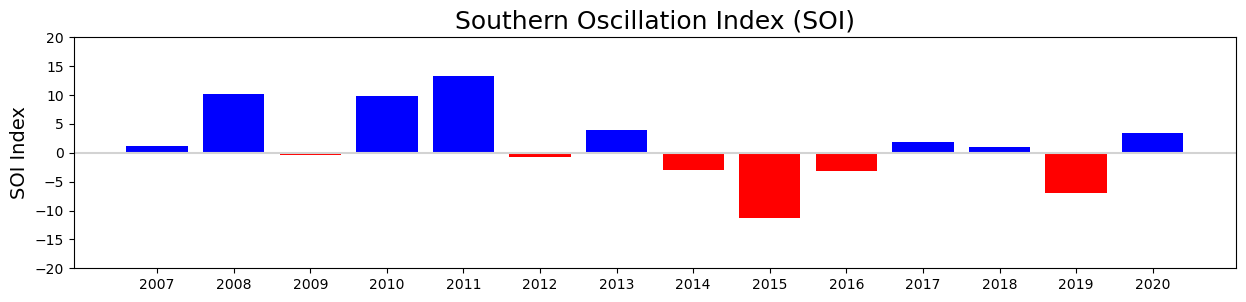

In [22]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]

xticks1=['2007','2008']
xticks2=['2009']
xticks3=['2010','2011']
xticks4=['2012']
xticks5=['2013']
xticks6=['2014','2015','2016']
xticks7=['2017','2018']
xticks8=['2019']
xticks9=['2020']

ax.bar(xticks1, SOI[0:2],label='SOI',color='blue')
ax.bar(xticks2, SOI[2],label='SOI',color='red')
ax.bar(xticks3, SOI[3:5],label='SOI',color='blue')
ax.bar(xticks4, SOI[5],label='SOI',color='red')
ax.bar(xticks5, SOI[6],label='SOI',color='blue')
ax.bar(xticks6, SOI[7:10],label='SOI',color='red')
ax.bar(xticks7, SOI[10:12],label='SOI',color='blue')
ax.bar(xticks8, SOI[12],label='SOI',color='red')
ax.bar(xticks9, SOI[13],label='SOI',color='blue')
#ax1.plot(xticks, AnnualNitrateAnom,marker='^',label='',color='orange')
#ax2.plot(xticks, SpringDiatomAnom,marker='s',linestyle='--',label='Spring Diatom Anomalies',color='forestgreen')
#ax.bar(x,y,color='k')

ax.set_title('Southern Oscillation Index (SOI)',fontsize=18)  #(with 2015)
ax.legend((),frameon=False,loc=3,fontsize=12)

ax.set_ylim(-20,20)

ax.set_ylabel('SOI Index',fontsize=14)

ax.axhline(y=0,color='lightgrey',linestyle='-')




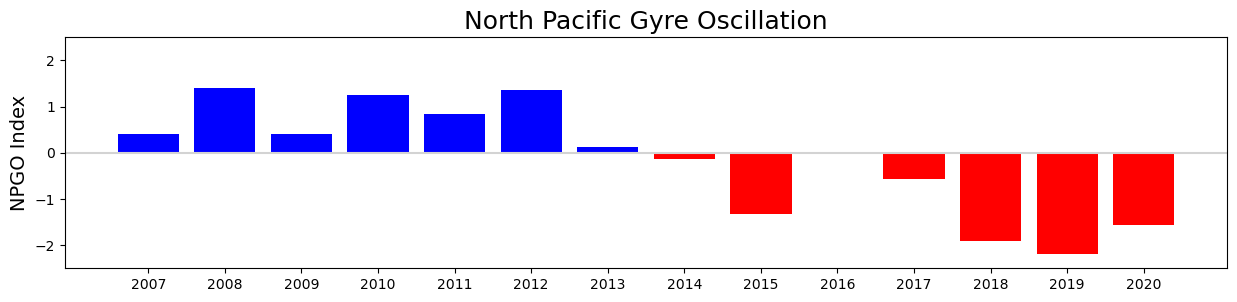

In [23]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]

xticks1=['2007','2008','2009','2010','2011','2012','2013']
xticks2=['2014','2015','2016','2017','2018','2019','2020']

ax.bar(xticks1, NPGO[0:7],label='NPGO',color='blue')
ax.bar(xticks2, NPGO[7:14],label='NPGO',color='red')
#ax1.plot(xticks, AnnualNitrateAnom,marker='^',label='',color='orange')

#ax.bar(x,y,color='k')

ax.set_title('North Pacific Gyre Oscillation',fontsize=18)  #(with 2015)
ax.legend((),frameon=False,loc=3,fontsize=12)

ax.set_ylim(-2.5,2.5)

ax.set_ylabel('NPGO Index',fontsize=14)

ax.axhline(y=0,color='lightgrey',linestyle='-')




In [24]:
PDO=np.array([-0.7025,-1.663333333,-1.031666667,-1.060833333,-1.811666667,-1.733333333,-1.165833333,0.554166667,0.920833333,0.673333333,-0.160833333,-0.365,-0.154166667,-1.145])

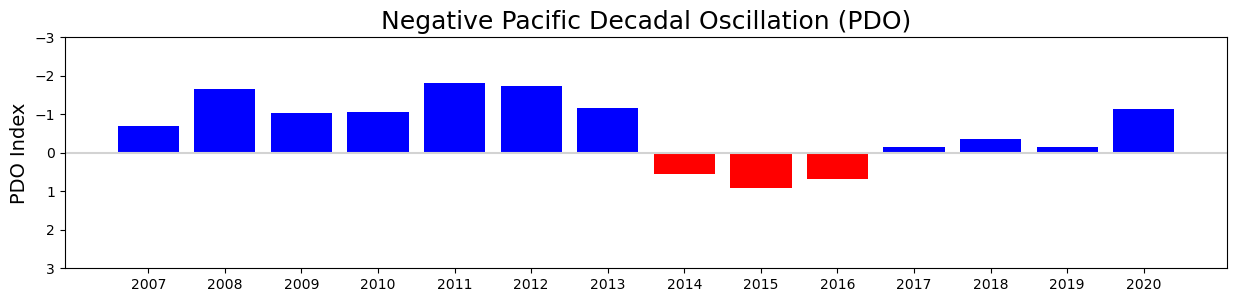

In [25]:
fig, ax = plt.subplots(figsize=(15, 3))
bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 0.9}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]

xticks1=['2007','2008','2009','2010','2011','2012','2013']
xticks2=['2014','2015','2016']
xticks3=['2017','2018','2019','2020']

ax.bar(xticks1,PDO[0:7],label='NPGO',color='blue')
ax.bar(xticks2,PDO[7:10],label='NPGO',color='red')
ax.bar(xticks3,PDO[10:14],label='NPGO',color='blue')
#ax1.plot(xticks, AnnualNitrateAnom,marker='^',label='',color='orange')

#ax.bar(x,y,color='k')

ax.set_title('Negative Pacific Decadal Oscillation (PDO)',fontsize=18)  #(with 2015)
ax.legend((),frameon=False,loc=3,fontsize=12)

ax.set_ylim(3,-3)

ax.set_ylabel('PDO Index',fontsize=14)

ax.axhline(y=0,color='lightgrey',linestyle='-')



